# Stock Analytic Platform 
## Description : Allow user to backtest their algorithm on the bursa stock model  

##Objective : To learn how algo trading works via building back testing

##Program Flow : 
###1.Retrieve all historical price for every stock on bursa and have it update on a daily basis
###2.Retrieve all comments for each stock 
###3.Plot out all Stock history price on matlibplot 
###4.create the algorithm to testify the correlation between comment count versus historical price [high | low | volume]
###5.Create a web platform from it, and will allow user to customize the logic they are intend to use.
###6.SHIP IT.


In [2]:
##To download all historical stock price

from bs4 import BeautifulSoup
import urllib
import urllib2
import re
import csv
import IPython.lib.display
import datetime as DT
import os.path


symbols=[]
quotes=[]


def comments_url_get(x):
        
    link = "http://klse.i3investor.com/jsp/scl/forum.jsp?fp=1&c=1" 
    page = urllib2.urlopen(link)
    soup = BeautifulSoup(page.read(),"lxml")
    comment_urls=[]
    i=0
    
    while(soup.body.findAll(**{'class':'forumtopic'})):
         i+=1
         link = "http://klse.i3investor.com/jsp/scl/forum.jsp?fp="+str(i)+"&c=1" 
         page = urllib2.urlopen(link)
         soup = BeautifulSoup(page.read(),"lxml")
         comment_urls.extend(re.sub('fp=\d+','',url['href'].encode('utf-8')) for url in soup.find_all('a',href=re.compile('/servlets/forum/\d+\.jsp'))) 
    print("fetch complete, writing now ...")
    with open ('comment_urls.csv','w') as fp:
        writer = csv.writer(fp,delimiter='\n')
        writer.writerows([comment_urls])
    print("write completed")
        
    
def stock_quote_get(fname):
    with open(fname) as f:
        content = f.readlines()
    for url in content:
        url.replace('\n','')
        link = "http://klse.i3investor.com"+url
        stock_quote_retrieval(link)
        with open('symbol_link.csv', 'w') as fp:
            a = csv.writer(fp,delimiter='\n')
            a.writerows([symbols])
    
def stock_quote_retrieval(link):
    page = urllib2.urlopen(link)
    soup = BeautifulSoup(page.read(),"lxml")
    symbols.append(soup.find('a', href=re.compile('/servlets/stk/.*\.jsp'))['href'])

#stock_quote_get("comment_urls.csv")

def symbol_retrieval(fname):
    with open(fname) as f:
        content = f.readlines()
    for symbol in content:
        quotes.append(re.search('(\d{4}(\w+)?)',symbol).group(1))
    with open('symbol_list.csv','w') as fp:
            writer = csv.writer(fp,delimiter='\n')
            writer.writerows([quotes])
            
#symbol_retrieval("symbol_link.csv")            



def stock_price_get(fname):
    
    save_path="/Users/ryan/DevOps/python/project_2_stock_analytic/symbols/"    
    
    with open('symbol_list.csv') as f:
        content = f.read().splitlines()
    for symbol in content: 
        urllib.urlretrieve("http://real-chart.finance.yahoo.com/table.csv?s="+symbol+".KL&d=7&e=18&f=2015&g=d&a=0&b=3&c=2000&ignore=.csv",os.path.join(save_path,symbol+".csv"))
             
             
                                   
#stock_price_get("symbol_list.csv")


0001.csv
0007.csv
0009.csv
0010.csv
0012.csv
0016.csv
0020.csv
0021.csv
0022.csv
0023.csv
0024.csv
0025.csv
0026.csv
0029.csv
0032.csv
0034.csv
0035.csv
0036.csv
0037.csv
0040.csv
0041.csv
0043.csv
0047.csv
0049.csv
0050.csv
0051.csv
0055.csv
0056.csv
0059.csv
0060.csv
0064.csv
0065.csv
0066.csv
0068.csv
0069.csv
0070.csv
0072.csv
0075.csv
0078.csv
0081.csv
0082.csv
0083.csv
0086.csv
0089.csv
0090.csv
0091.csv
0093.csv
0094.csv
0095.csv
0096.csv
0097.csv
0099.csv
0100.csv
0101.csv
0102.csv
0103.csv
0104.csv
0109.csv
0110.csv
0111.csv
0112.csv
0113.csv
0116.csv
0117.csv
0118.csv
0120.csv
0123.csv
0126.csv
0127.csv
0128.csv
0131.csv
0133.csv
0136.csv
0138.csv
0140.csv
0141.csv


ValueError: Some errors were detected !
    Line #1070 (got 3 columns instead of 7)

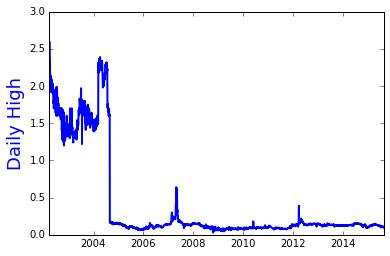

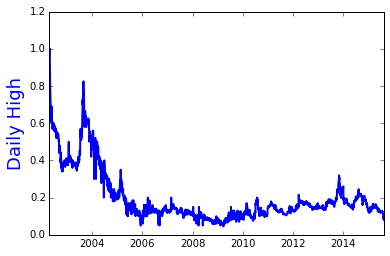

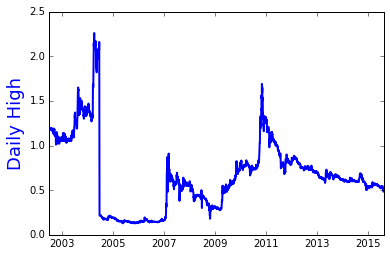

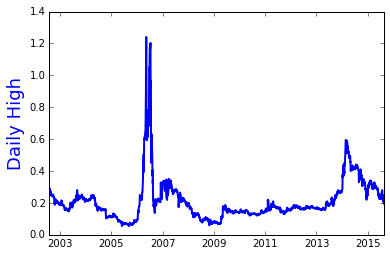

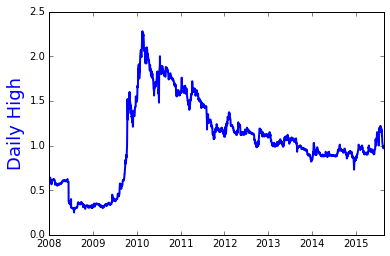

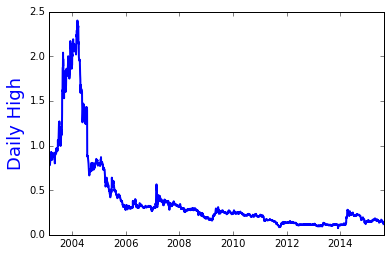

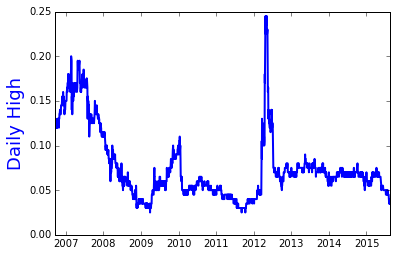

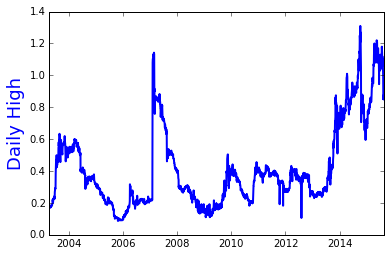

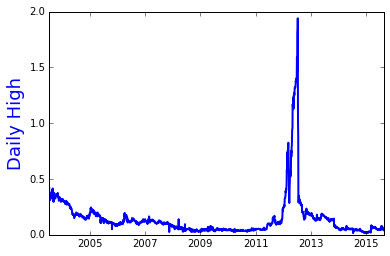

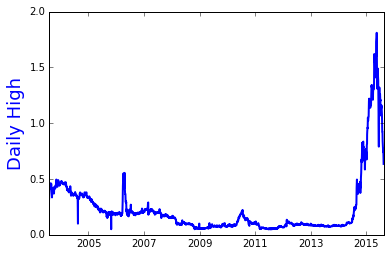

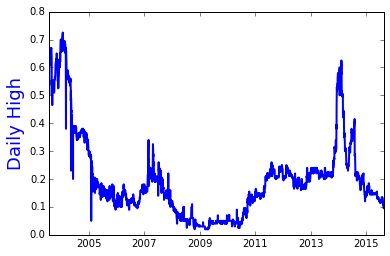

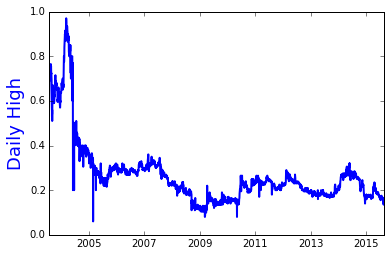

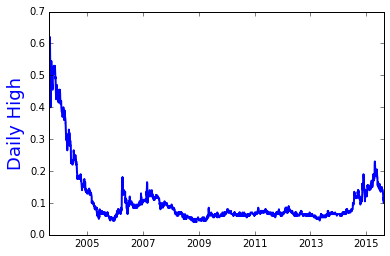

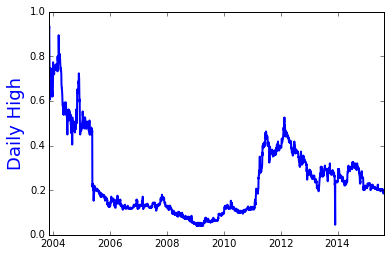

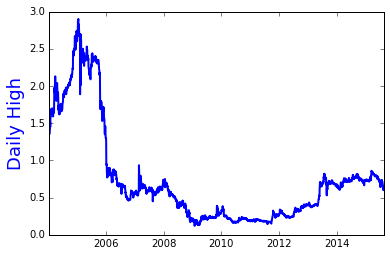

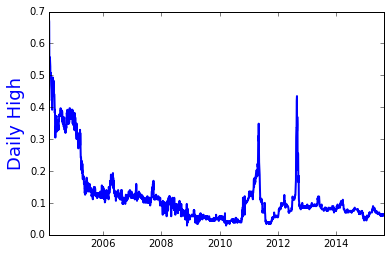

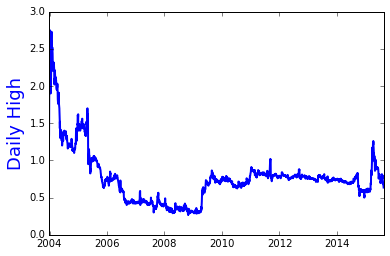

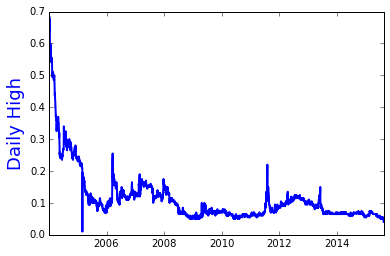

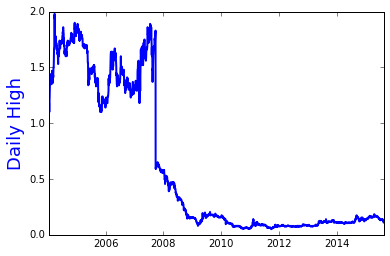

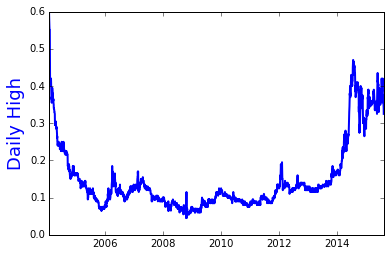

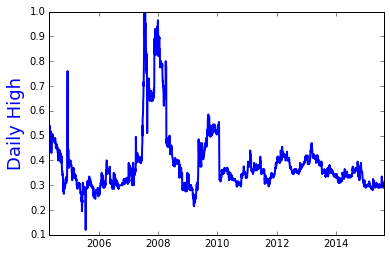

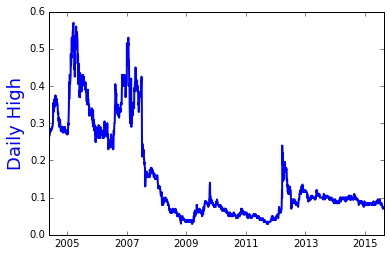

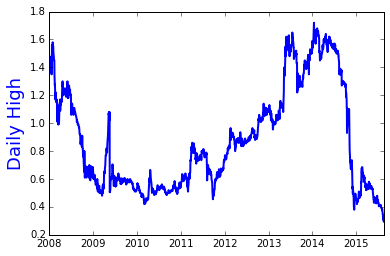

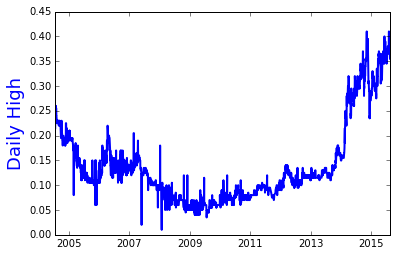

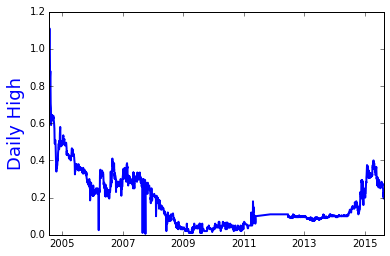

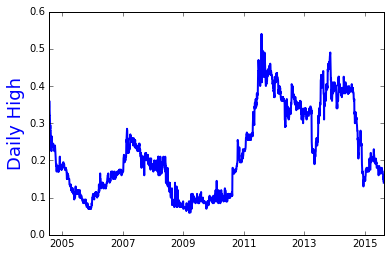

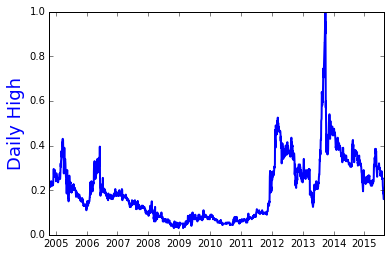

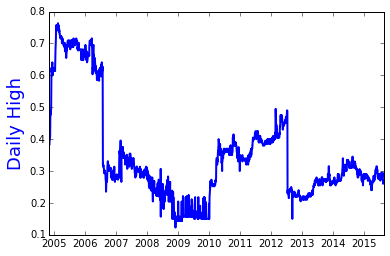

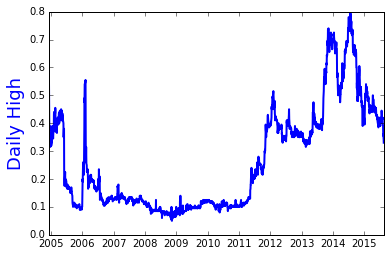

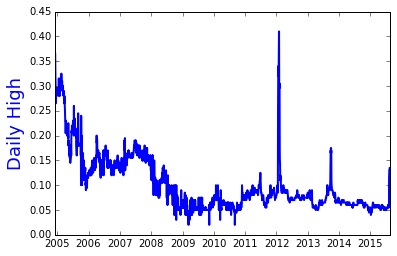

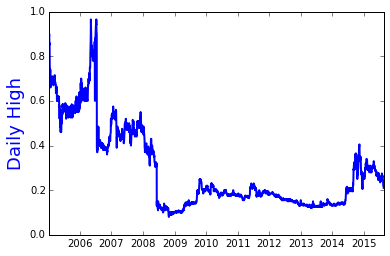

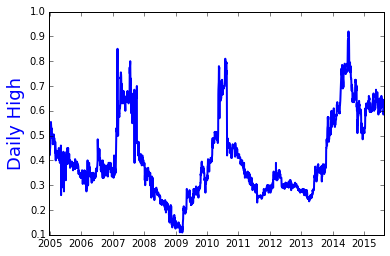

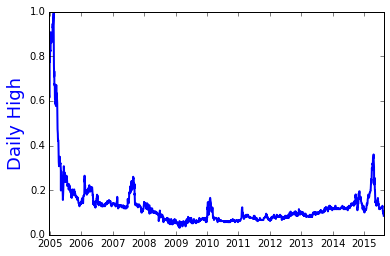

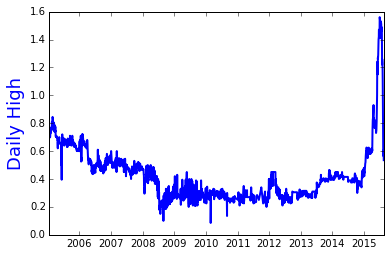

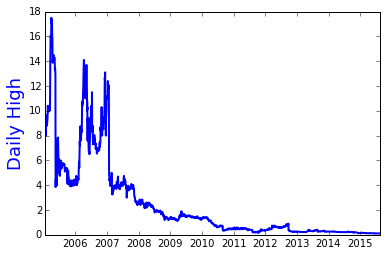

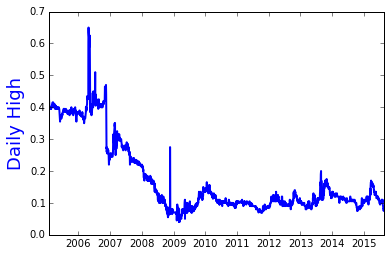

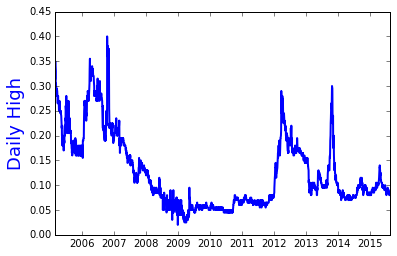

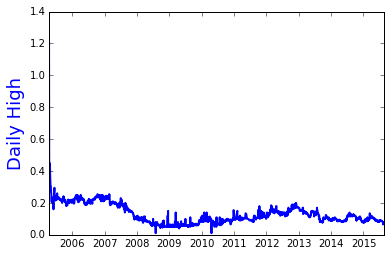

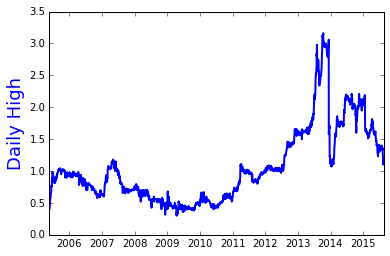

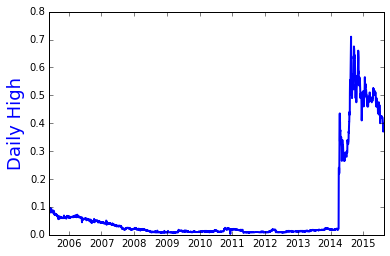

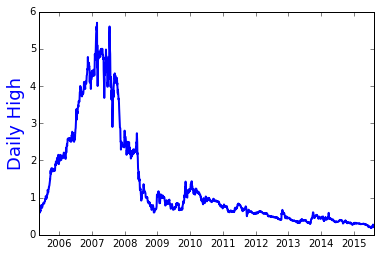

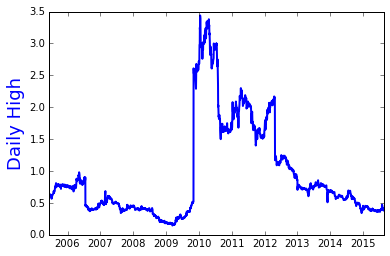

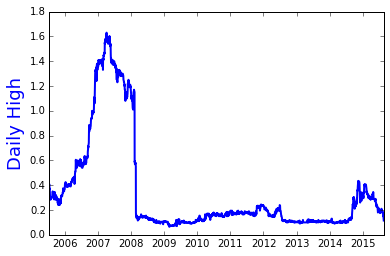

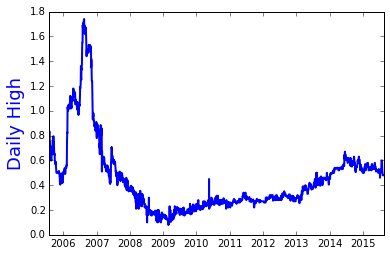

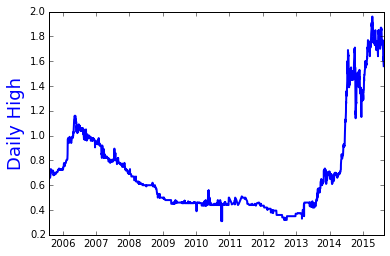

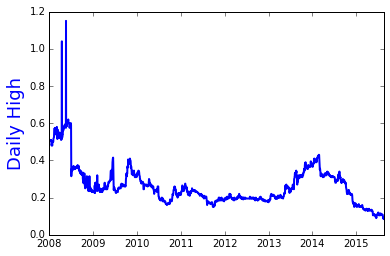

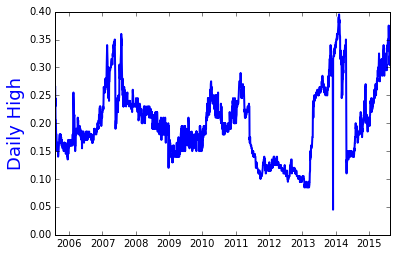

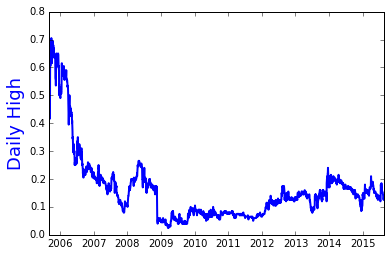

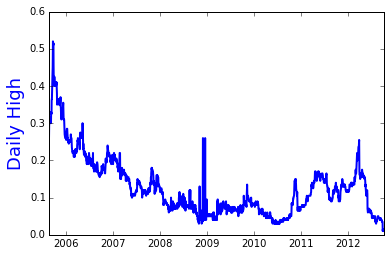

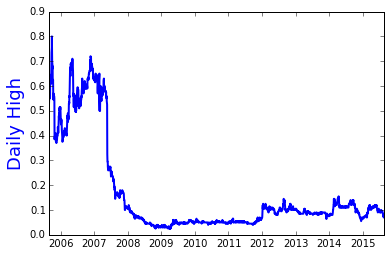

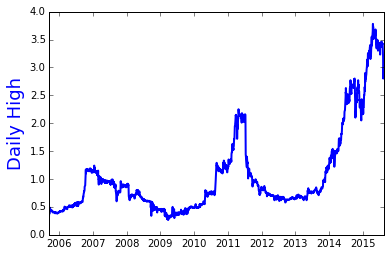

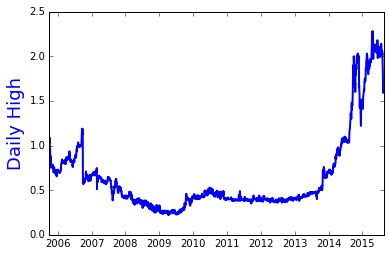

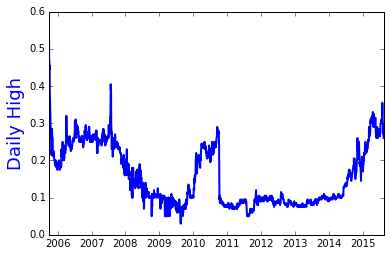

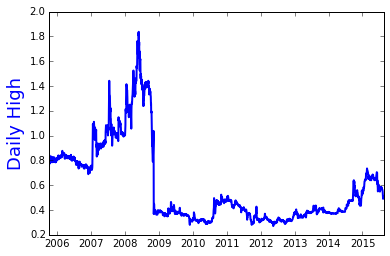

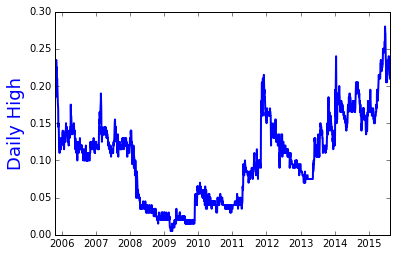

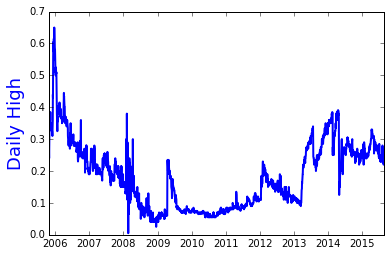

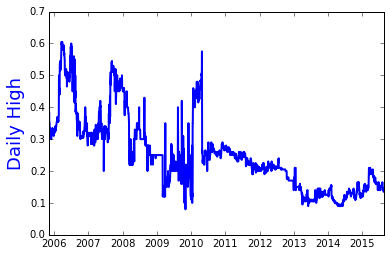

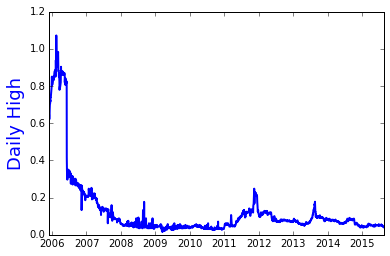

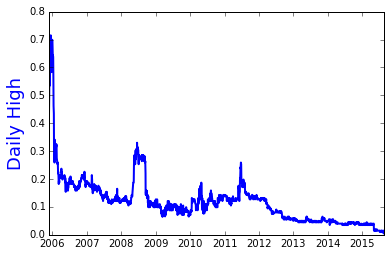

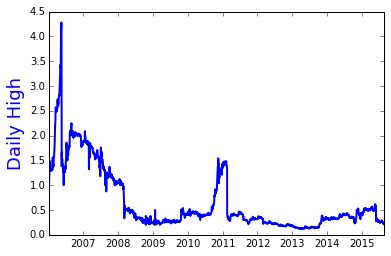

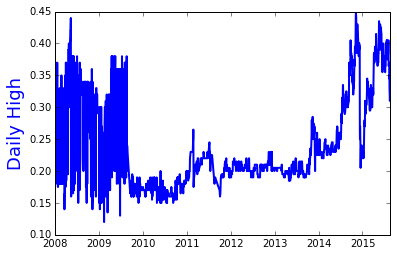

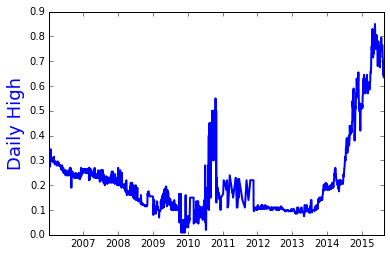

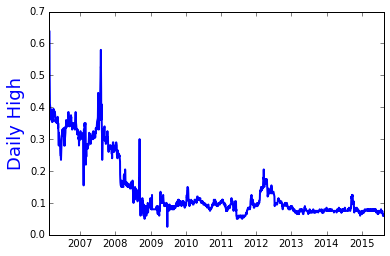

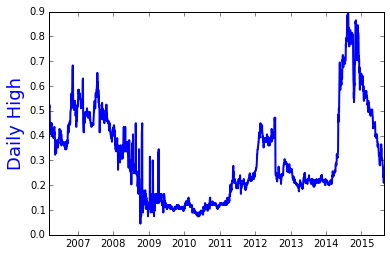

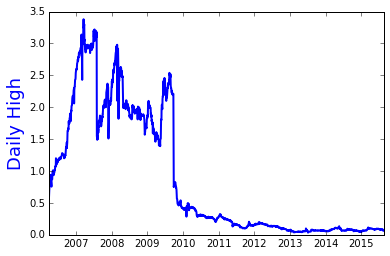

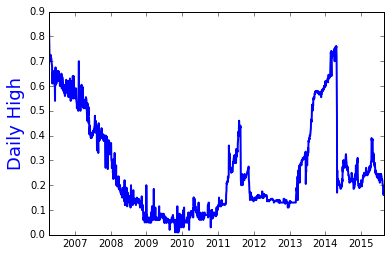

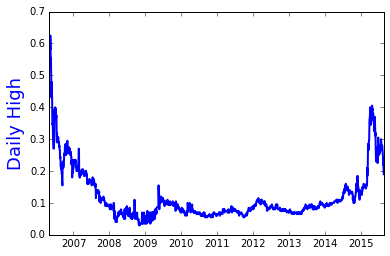

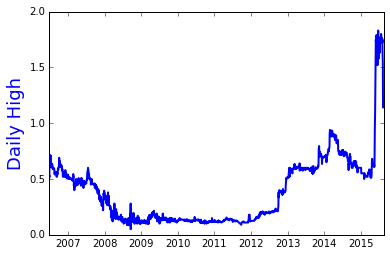

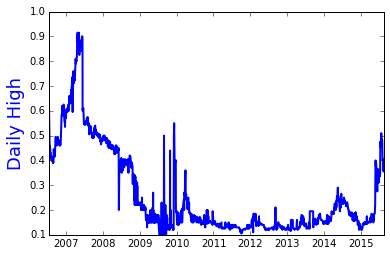

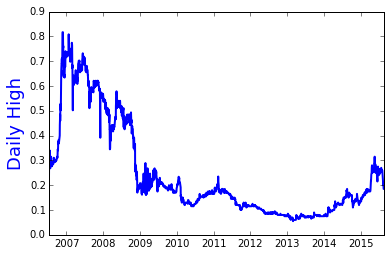

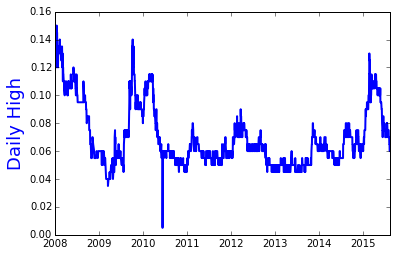

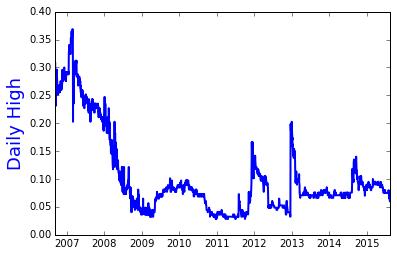

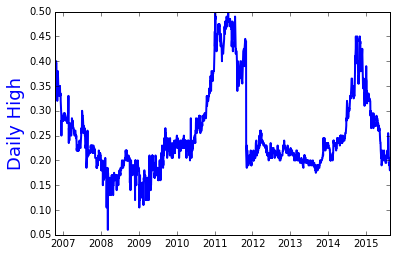

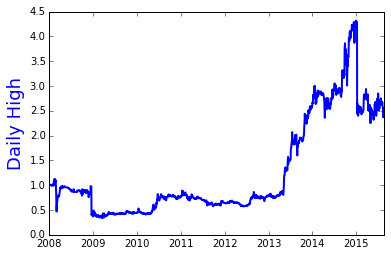

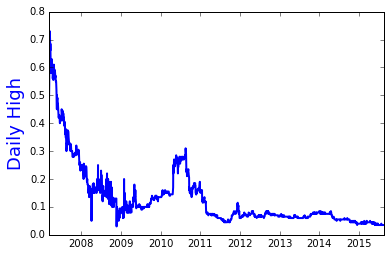

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates as matdates 
from datetime import datetime 
from os import listdir

i=1

all_files = listdir('/Users/ryan/DevOps/python/project_2_stock_analytic/symbols/')

for file in all_files:
    print(file)
    plt.figure(i)
    data = np.genfromtxt('symbols/'+file, delimiter=',',names=True,dtype=None)
    dates = data['Date']
    high = data['High']
    low = data['Low']
    vol = data['Volume']

    date_objects = [datetime.strptime(date, '%Y-%m-%d') for date in dates]
    fds = matdates.date2num(date_objects)

    fig,ax1 = plt.subplots()

    ax1.plot_date(fds,low,'-',lw=2)
    ax1.set_ylabel(r"Daily High", fontsize=18, color="blue")
    i+=1
    
    
plt.show()


##Manage to retrieve all historical price from bursa stock market 
##Download all comment for all stock from i3vestor 

In [ ]:
#Download all i3vestor comments 

from bs4 import BeautifulSoup
import urllib2
import re
import csv
import IPython.lib.display
import datetime as DT
from collections import Counter


link="http://klse.i3investor.com/servlets/forum/800000556.jsp?ftp="
page = urllib2.urlopen(link)
soup = BeautifulSoup(page.read(),"lxml")


with open("comment_urls.csv") as f:
        content = f.read().splitlines()

        
def usercom(link):
    page = urllib2.urlopen(link)
    soup = BeautifulSoup(page.read(),"lxml")
    for br in soup.findAll('br'):
        br.extract()
#    users = [user.string.encode('utf-8') for user in soup.find_all('span',**{'class':'comuid'})]
#    comments = [comment.text.encode('utf-8') for comment in soup.find_all('span',id=re.compile('comcontent\d+'))]
    timestamps = [timestamp.text.encode('utf-8') for timestamp in soup.find_all('span',**{'class':'comdt'})]
#    del users[0]
#    del users[0]
#    c_users = []
    i = 0
    date = [DT.datetime.strptime(timestamp, "%b %d, %Y %I:%M %p").strftime('%Y-%m-%d') for timestamp in timestamps]
    c = Counter(date)
    dict.items(c)
    key = c.keys()
    value = c.values()
    data = zip(key,value)
    with open('bat_comment.csv', 'a') as fp:
        writer = csv.writer(fp,delimiter='\n')
        writer.writerows(data)

pageNumber = [num.b.string for num in soup.find_all('div',style='float:right;')]
i = 1 
pageNumber = int(pageNumber[0])+1

for i in range(i,int(pageNumber)):
    lnk=str(i)
    url=link+lnk
    usercom(url)

In [4]:
##need to create script to calculate the frequency of comments for that day. 

from HTMLParser import HTMLParser

class print_tags(HTMLParser):
    def handle_starttag(self, tag, attrs):
        print tag # TODO: add/update dict

htm        
        
parser = print_tags()
parser.feed("http://klse.i3investor.com/servlets/forum/800000556.jsp?ftp=%22","postcount")


In [34]:
##calculate the frequency of comment using Beautiful soup

from bs4 import BeautifulSoup as BS
import urllib2

html =  " http://klse.i3investor.com/servlets/forum/800000556.jsp?ftp=22 "     


def num_apperances_of_tag(tag_name, html):
    page = urllib2.urlopen(html)
    soup = BS(page.read(),"lxml")
    return len(soup.find_all('span',**{'class':'postcount'}))


num_apperances_of_tag(tag_name,html)

50

In [ ]:
## calculate similar date 

import pandas as pd
from collections import Counter
import csv

df = pd.read_csv('bat_comment.csv')
saved_column=df.date
c = Counter(saved_column)
dict.items(c)
key = c.keys()
value = c.values()
data = zip(key,value)

print (data)
"""
with open('bat_count.csv', 'w') as fp:
        a = csv.writer(fp, delimiter=',')
        a.writerows(data)
"""